# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

[0.01       0.10888889 0.20777778 0.30666667 0.40555556 0.50444444
 0.60333333 0.70222222 0.80111111 0.9       ] [0.01, 0.10888888888888888, 0.20777777777777778, 0.30666666666666664, 0.40555555555555556, 0.5044444444444445, 0.6033333333333333, 0.7022222222222222, 0.8011111111111111, 0.9]


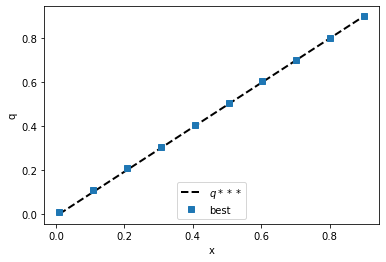

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# N is the number of 'checks' we make for each x and q
N = 10
v = -2
#x_vec is defined as range between 0.01 and 0.9 with N (10) evenly spaced values
x_vec = np.linspace(0.01,0.9,N)
y = 1
p = 0.2

#Utility function
def utility(z):
    return z**(1+v)/(1+v)

#Value function taking q's and x's, as these are our variables
def value_func(q,x):
    return p*utility(y-x+q-p*q)+(1-p)*utility(y-p*q)

#Array for our future q_best values for each x
q_best = []

#Now we generate our x's and use itterations of i for future indexing
for i,x in enumerate(x_vec):
    #q_vec is defined to be in the range [0,x] and with N (10) evenly spaced values
    q_vec = np.linspace(0,x,N)
    #q_best array is appended with the first q in the linspace, which is used to compare q values
    q_best.append(q_vec[i])
    #Now we check each q in our q_vec to see if value function is greater than the previous best
    for q in q_vec:
        value_now = value_func(q,x)
        value_best = value_func(q_best[i],x)
        if value_now > value_best:
            q_best[i] = q
print(x_vec, q_best)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,q_vec,ls='--',lw=2,color='black',label='$q***$')
ax.plot(x_vec,q_best,ls='',marker='s',label='best')

ax.set_xlabel('x')
ax.set_ylabel('q')
ax.legend(loc='lower center',frameon=True);

# Question 2

Explain your code and procedure

[0.0, 0.01, 0.0, 0.07555555555555554, 0.0, 0.1411111111111111, 0.0, 0.20666666666666667, 0.0, 0.0, 0.33777777777777773, 0.0, 0.4033333333333333, 0.0, 0.46888888888888886, 0.0, 0.5344444444444444, 0.0, 0.6]


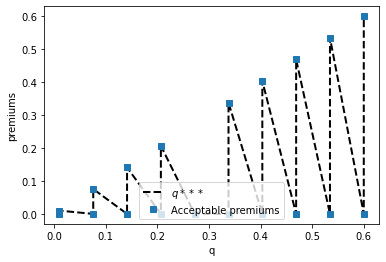

In [20]:
def value_func_noins(p,q,x):
    return p*utility(y-x)+(1-p)*utility(y)

def value_func(p,q,x):
    return p*utility(y-x+q-p*q)+(1-p)*utility(y-p*q)

#2.1 set x = 0.6 and grid of q in range [0.01,0.6]
x = 0.6
q_vec = np.linspace(0.01,x,N)
#p_vec for each 1% between 0 and 100%.
p_vec = np.linspace(0,1,101)

#Array for storing premiums that ensures value functions to be equal
pi_acceptable = []
#Array for storing q values for the x-axis in the plot for 2.3
q_vec_plot = []

#Loop over each q in q_vec
for q in q_vec:
    #Loop over each p in p_vec
    for p in p_vec:
        #Check for each q and p value when the value functions are equal
        if value_func(p,q,x) == value_func_noins(p,q,x):
            #If value functions are equal, we append pi_acceptable with p*q which is defined as pi
            pi_acceptable.append(p*q)
            #And we append the x-axis values with q values (this is only because for some q values, there are 2 premias)
            q_vec_plot.append(q)
print(pi_acceptable)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q_vec_plot,pi_acceptable,ls='--',lw=2,color='black',label='$q***$')
ax.plot(q_vec_plot,pi_acceptable,ls='',marker='s',label='Acceptable premiums')

ax.set_xlabel('q')
ax.set_ylabel('premiums')
ax.legend(loc='lower center',frameon=True);

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.